**Title**: Classifying Exo-Planet Types

**Introduction**:

When searching for earth-like planets in our galaxy, scientists can classify exoplanets based on their radius and distance from their sun, also known as orbital radius (Jones et al, 2006; Otegi et al, 2019).  These two characteristics help us determine the composition and density of planets (ie. if they are gaseous or terrestrial). With our project, we are attempting to look at the planet’s radius and orbital radius from their sun in order to classify it based on the following categories: Neptune-like, Gas-Giant, Super Earth, Terrestrial and Unknown. This will help us answer the question: Given orbital radius and planetary radius, how can we classify exoplanets? To address this question, we will be using the dataset “NASA Exoplanets” which contains a comprehensive  archive of all of the planets outside of our solar system that NASA has discovered through various missions and observatories. It includes information on each planet’s brightness, distance from earth, orbital radius, radius, and mass. Certain variables, such as mass and radius, are broken down into a “multiplier” and “with respect to” planet in our solar system. 


**Preliminary exploratory data analysis**:

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [50]:
#read the data updated

data <- read_csv("https://drive.google.com/uc?export=download&id=1DFDwrd-1pEzLSik8UhBRZsVjOfAkRI4B")

#clean the data (new column giving radius of the planet relative to Earth's radius)

data$radius_wrt_num[data$radius_wrt == "Earth"] <- 1
data$radius_wrt_num[data$radius_wrt == "Jupiter"] <- 11.2
data$planet_type <- as.factor(data$planet_type)
data <- data |>
    mutate(planetary_radius_prop = radius_wrt_num * radius_multiplier) |>
    select(-radius_wrt_num) 

data <- subset(data,orbital_radius != "" )

data <-subset(data,planetary_radius_prop != "" )
data
#split data into training & testing
set.seed(1)
split_data <- initial_split(data, prop = 0.75, strata = planet_type)
data_train <- training(split_data) 
data_test <- testing(split_data)

Rows: 5250 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): name, planet_type, mass_wrt, radius_wrt, detection_method
dbl (8): distance, stellar_magnitude, discovery_year, mass_multiplier, radiu...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Unknown or uninitialised column: `radius_wrt_num`.”


name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method,planetary_radius_prop
<chr>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
11 Comae Berenices b,304,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,8.925394e-01,0.23,Radial Velocity,12.0960
11 Ursae Minoris b,409,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000e+00,0.08,Radial Velocity,12.2080
14 Andromedae b,246,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,5.086927e-01,0.00,Radial Velocity,12.8800
14 Herculis b,58,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000e+00,0.37,Radial Velocity,12.5440
16 Cygni B b,69,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000e+00,0.68,Radial Velocity,13.4400
17 Scorpii b,408,5.22606,Gas Giant,2020,4.32000,Jupiter,1.150,Jupiter,1.450000,1.600000e+00,0.06,Radial Velocity,12.8800
18 Delphini b,249,5.51048,Gas Giant,2008,10.30000,Jupiter,1.110,Jupiter,2.600000,2.700000e+00,0.08,Radial Velocity,12.4320
1RXS J160929.1-210524 b,454,12.61800,Gas Giant,2008,8.00000,Jupiter,1.664,Jupiter,330.000000,6.505900e+03,0.00,Direct Imaging,18.6368
24 Bootis b,313,5.59000,Gas Giant,2018,0.91000,Jupiter,1.240,Jupiter,0.190000,8.323066e-02,0.04,Radial Velocity,13.8880


In [38]:
#summarize data
planet_types <- data_train |> 
    group_by(planet_type) |>
    summarize(number_of_planets = n()) |>
    mutate(percentage_of_total = round((number_of_planets/sum(number_of_planets))*100,2))
planet_types #types of planets and how many planets are categorized into each type

orbital_radius <- data_train |>
    group_by(planet_type) |>
    summarize(orbital_min = min(orbital_radius, na.rm = TRUE),
             orbital_max = max(orbital_radius, na.rm = TRUE))
orbital_radius

planet_type,number_of_planets,percentage_of_total
<chr>,<int>,<dbl>
Gas Giant,1184,31.91
Neptune-like,1274,34.33
Super Earth,1122,30.23
Terrestrial,131,3.53


planet_type,orbital_min,orbital_max
<chr>,<dbl>,<dbl>
Gas Giant,0.0102,7506.00
Neptune-like,0.0129,5.40
Super Earth,0.0064,10.26
Terrestrial,0.0058,1.26


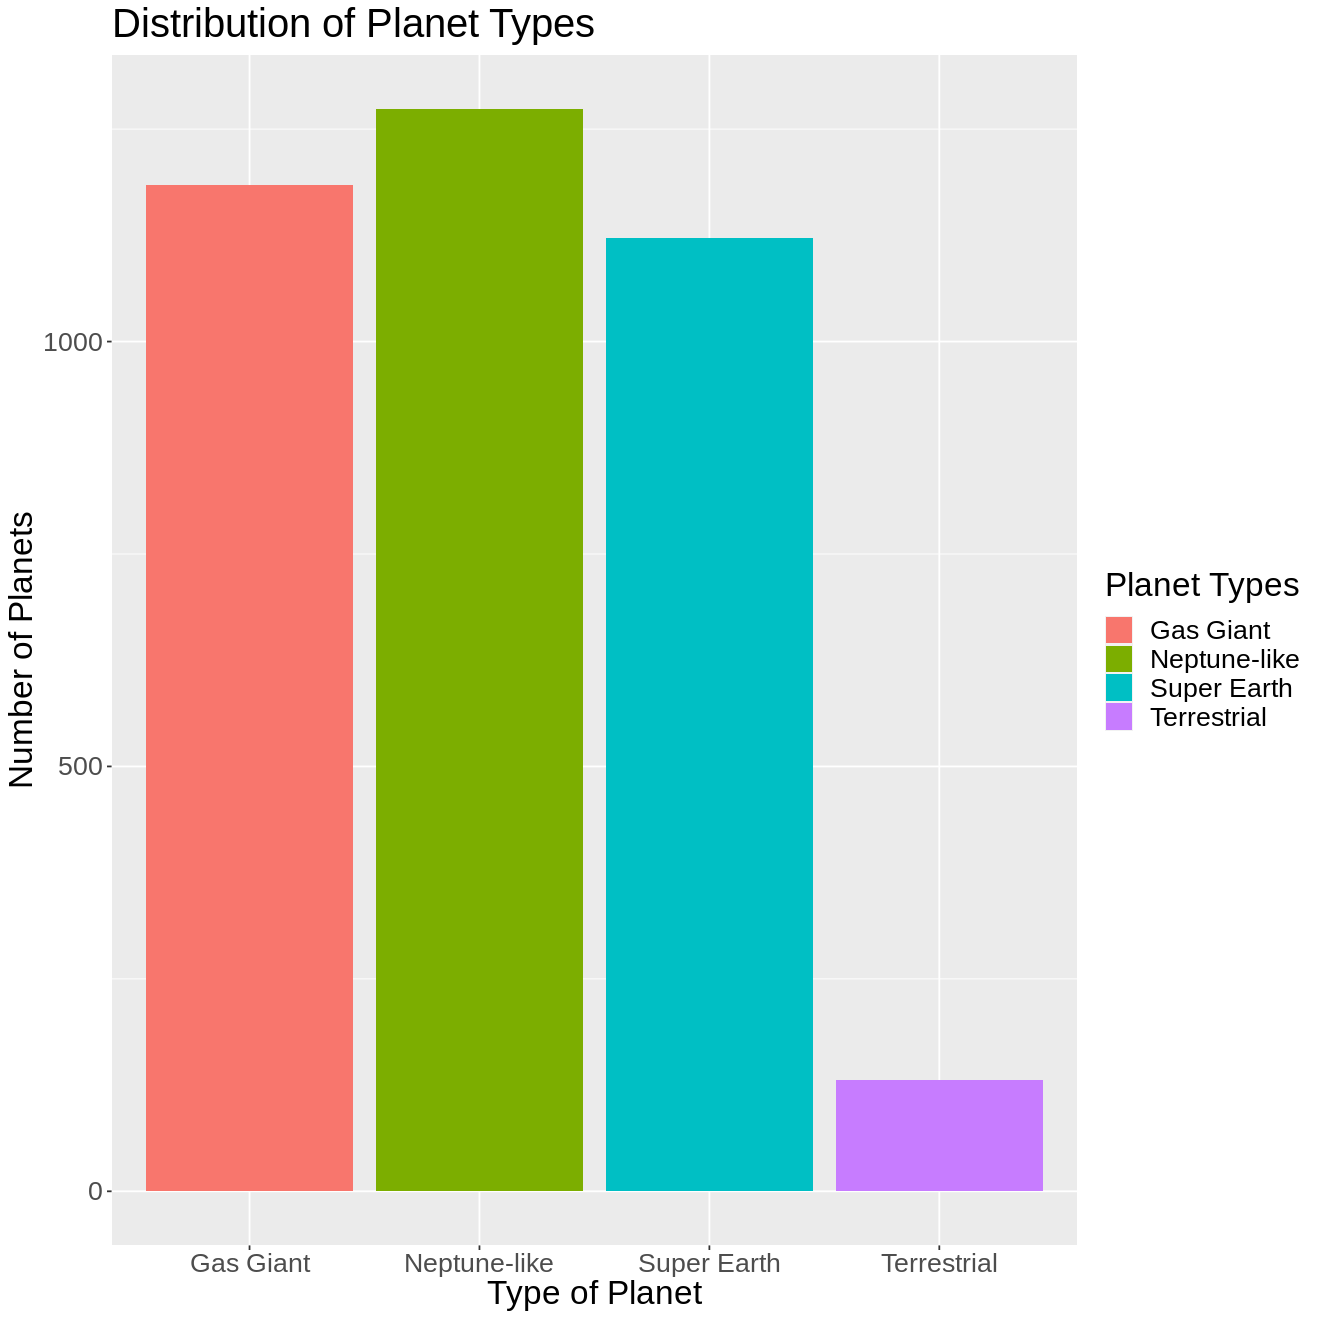

In [39]:
#data visualization 1: distribution of planet types
options(repr.plot.width = 11, repr.plot.height = 11)

planet_type_dist <- planet_types |>
    select(-percentage_of_total) |>
    ggplot(aes(x = planet_type, y = number_of_planets, fill = planet_type)) +
    geom_bar(stat = "identity") +
    labs(x = "Type of Planet", y = "Number of Planets", fill = "Planet Types") +
    theme(text = element_text(size = 20)) +
    ggtitle("Distribution of Planet Types")
planet_type_dist

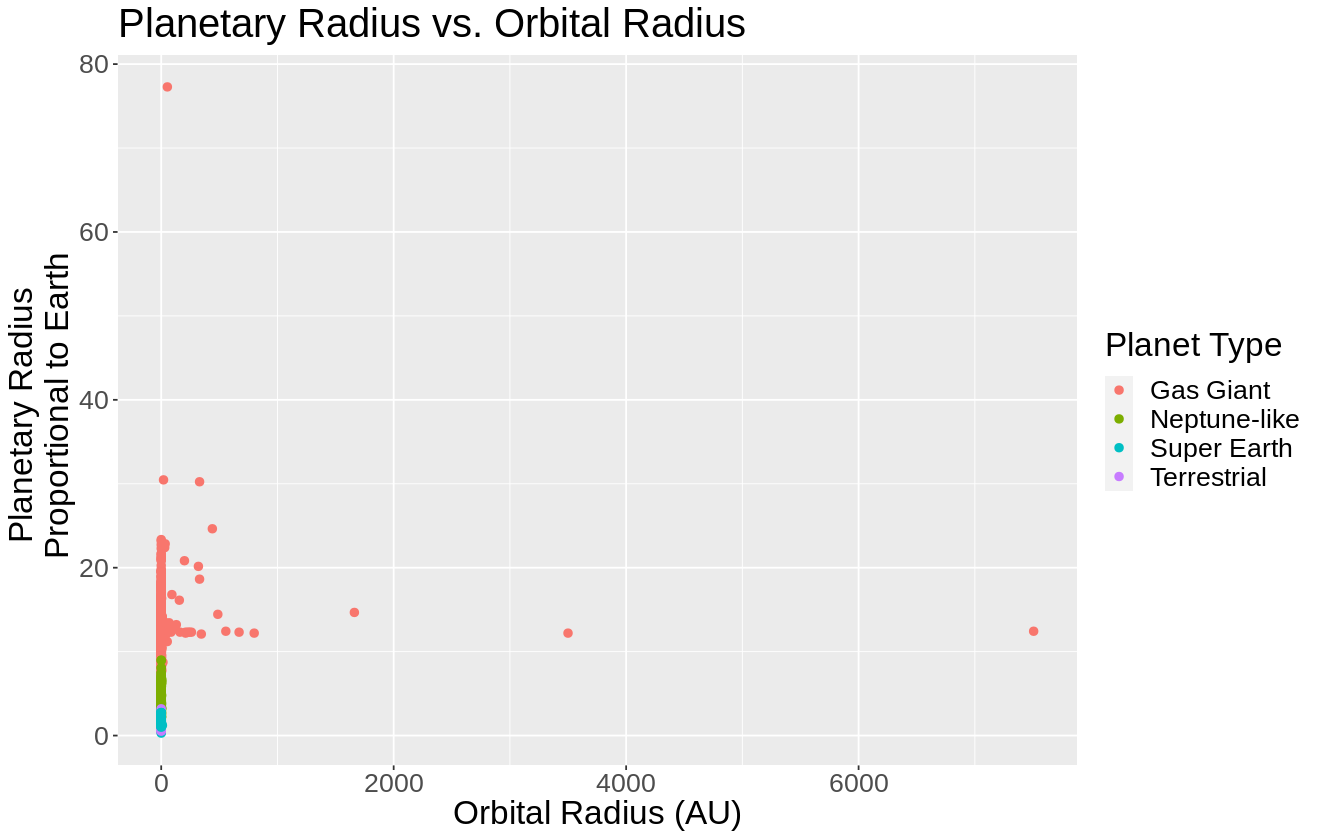

In [40]:
#data visualization 2: how planetary radius and orbital radius influences planet type
options(repr.plot.width = 11, repr.plot.height = 7)

planet_dist <- data_train |>
    select(planet_type,orbital_radius, planetary_radius_prop) |>
    ggplot(aes(x = orbital_radius, y = planetary_radius_prop, color = planet_type)) +
    geom_point(size = 2) +
    labs(x = "Orbital Radius (AU)", y = "Planetary Radius \n Proportional to Earth", color = "Planet Type") +
    theme(text = element_text(size = 20)) +
    ggtitle("Planetary Radius vs. Orbital Radius")
planet_dist

**Methods**:

We will be using the **orbital_radius**, **radius_multiplier**, and **radius_wrt** of the planet to create a model that can classify new exoplanet discoveries. We will use radius_multiplier and radius_wrt to create a new column that is planetary radius (relative to earth) by multiplying the radius_multiplier of all planets that have radius_wrt=Jupiter by 11.2 and all planets with radius_wrt=Earth by one. Note that Jupiter is 11.2 times the size of earth. This new column will be called **planetary_radius_prop** and will be plotted against orbital radius in a scatterplot. 

We will be using a scatterplot of planetary radius (relative to earth) vs orbital radius to visualize the results and show the relationship between these two variables. To visualize the distribution of different planet types in this plot (Neptune-like, Gas-Giant, Super Earth, Terrestrial and Unknown), we will color the points based on the variable planet type. We will standardize the two variables for more accurate data representation and scale the graph to reduce outliers. To further explore the relationship we will zoom in on the graph.

In [55]:
set.seed(1)
options(repr.plot.height = 5, repr.plot.width = 6)


planet_recipe <- recipe(planet_type ~ orbital_radius + planetary_radius_prop  , data = data_train) |>
 step_scale(orbital_radius,planetary_radius_prop) |>
step_center(orbital_radius,planetary_radius_prop)


planet_spec <- nearest_neighbor(weight_func = "rectangular" , neighbors = 5) |>
       set_engine("kknn") |>
       set_mode("classification")

planet_fit <- workflow() |>
       add_recipe(planet_recipe) |>
       add_model(planet_spec) |>
       fit(data = data_train)


planet_train_predictions <- predict( planet_fit, data_train) |>
bind_cols(data_train)
head(planet_train_predictions)

planet_prediction_accuracy <- planet_train_predictions |>
        metrics(truth = .pred_class, estimate = planet_type)             
planet_prediction_accuracy

planet_test_predictions <- predict( planet_fit, data_test) |>
bind_cols(data_test)
head(planet_test_predictions)

planet_prediction_accuracy2 <- planet_test_predictions |>
        metrics(truth = .pred_class, estimate = planet_type)             
planet_prediction_accuracy2

.pred_class,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method,planetary_radius_prop
<fct>,<chr>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Gas Giant,11 Comae Berenices b,304,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,8.925394e-01,0.23,Radial Velocity,12.0960
Gas Giant,14 Herculis b,58,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000e+00,0.37,Radial Velocity,12.5440
Gas Giant,16 Cygni B b,69,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000e+00,0.68,Radial Velocity,13.4400
Gas Giant,18 Delphini b,249,5.51048,Gas Giant,2008,10.30000,Jupiter,1.110,Jupiter,2.600000,2.700000e+00,0.08,Radial Velocity,12.4320
Gas Giant,1RXS J160929.1-210524 b,454,12.61800,Gas Giant,2008,8.00000,Jupiter,1.664,Jupiter,330.000000,6.505900e+03,0.00,Direct Imaging,18.6368
Gas Giant,24 Bootis b,313,5.59000,Gas Giant,2018,0.91000,Jupiter,1.240,Jupiter,0.190000,8.323066e-02,0.04,Radial Velocity,13.8880


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.9657774
kap,multiclass,0.9502291


.pred_class,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method,planetary_radius_prop
<fct>,<chr>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Gas Giant,11 Ursae Minoris b,409,5.01300,Gas Giant,2009,14.74,Jupiter,1.09,Jupiter,1.53,1.4000000,0.08,Radial Velocity,12.208
Gas Giant,14 Andromedae b,246,5.23133,Gas Giant,2008,4.80,Jupiter,1.15,Jupiter,0.83,0.5086927,0.00,Radial Velocity,12.880
Gas Giant,17 Scorpii b,408,5.22606,Gas Giant,2020,4.32,Jupiter,1.15,Jupiter,1.45,1.6000000,0.06,Radial Velocity,12.880
Gas Giant,24 Sextantis c,235,6.45350,Gas Giant,2010,0.86,Jupiter,1.24,Jupiter,2.08,2.4000000,0.29,Radial Velocity,13.888
Gas Giant,2M0437 b,419,16.18600,Gas Giant,2021,4.00,Jupiter,1.16,Jupiter,118.00,3110.6000000,0.00,Direct Imaging,12.992
Gas Giant,2MASS J19383260+4603591 b,1293,12.65100,Gas Giant,2015,1.90,Jupiter,1.20,Jupiter,0.92,1.1115674,0.33,Eclipse Timing Variations,13.440


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.9620355
kap,multiclass,0.9451026


**Expected outcomes and significance**:

*What do you expect to find?*

We expect to find that planets with smaller radii will be rocky planet types like terrestrial and super earth whereas planets with larger radii will be gaseous planet types like Neptune-like and gas giants. Also, we would expect to find that the further away that a planet orbits its sun, the more likely it is to be a gaseous planet type, and vice versa, the closer a planet orbits its sun, the more likely it is to be a rocky planet type. 

*What impact could such findings have?*

Identifying terrestrial planets with a composition and gravity similar to that of earth’s could be impactful as it could lead to discoveries of life in other areas of our galaxy. If there are other planets that are similar to earth, it is reasonable to explore the possibility that the conditions that lead to life here could also lead to life elsewhere. 

*What future questions could this lead to?*

Some further questions we could ask is if the planet is habitable. We determined what type of planet it is and from there we could further narrow down to its habitability. Another question this could lead to is if this planet could be colonized by humans - how far away is it from earth?

**Citations**

Jones, B. (2008). Exoplanets – search methods, discoveries, and prospects for astrobiology. International Journal of Astrobiology, 7(3-4), 279-292. doi:10.1017/S147355040800428X

Otegi, J. F., Bouchy, F., & Helled, R. (2020). Revisited mass-radius relations for exoplanets below 120 m⊕. Astronomy & Astrophysics, 634. https://doi.org/10.1051/0004-6361/201936482